In [6]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join("..", "src")))
print(os.path.abspath(os.path.join("..", "src")))

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_csv('C:/Users/tneron2023/PycharmProjects/Python_IA/project_hotel/datas/Hotel_clean.csv', low_memory=False)

df.info()

C:\Users\tneron2023\PycharmProjects\Python_IA\project_hotel\src
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_can

In [7]:
from sklearn.model_selection import train_test_split

# critères de base
x = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']]

# Critère à prédire
y = df['booking_status_Not_Canceled']

# splitter les données : 80% de training /20% de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree_1 = DecisionTreeClassifier()
tree_1.fit(x_train, y_train)

DecisionTreeClassifier()

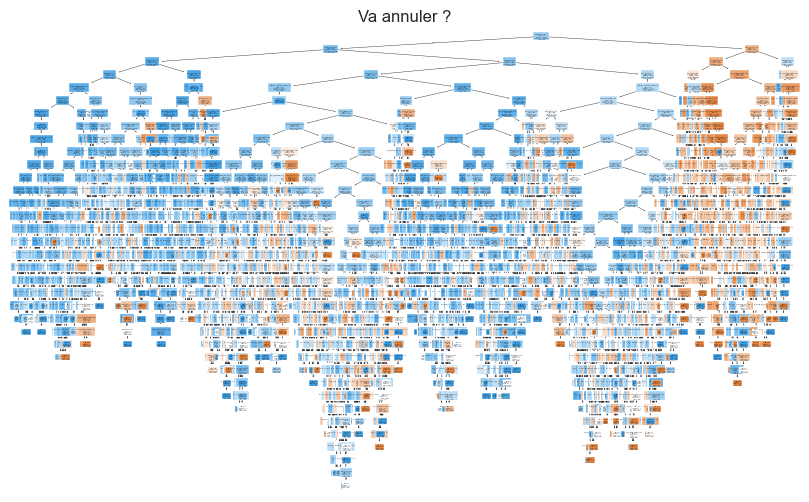

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(tree_1, feature_names=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'], class_names=['Non', 'Oui'], filled=True)
plt.title("Va annuler ?")
plt.show()

In [10]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5)

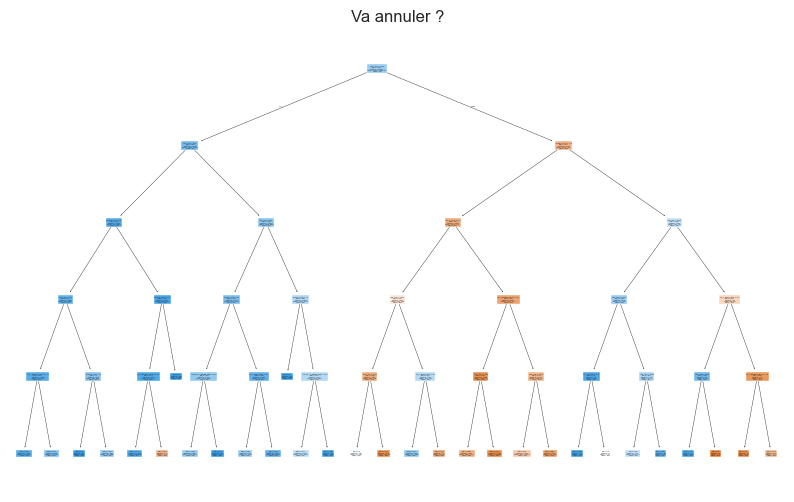

In [11]:
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'], class_names=['Non', 'Oui'], filled=True)
plt.title("Va annuler ?")
plt.show()

In [12]:
from sklearn.metrics import accuracy_score

prediction_quality = model.predict(x_test)

accuracy = accuracy_score(y_test, prediction_quality)

print(f"Accurancy: {accuracy}")

Accurancy: 0.7671666666666667


📷 Graphique sauvegardé dans : rfr_predict_errorRandomForest.png


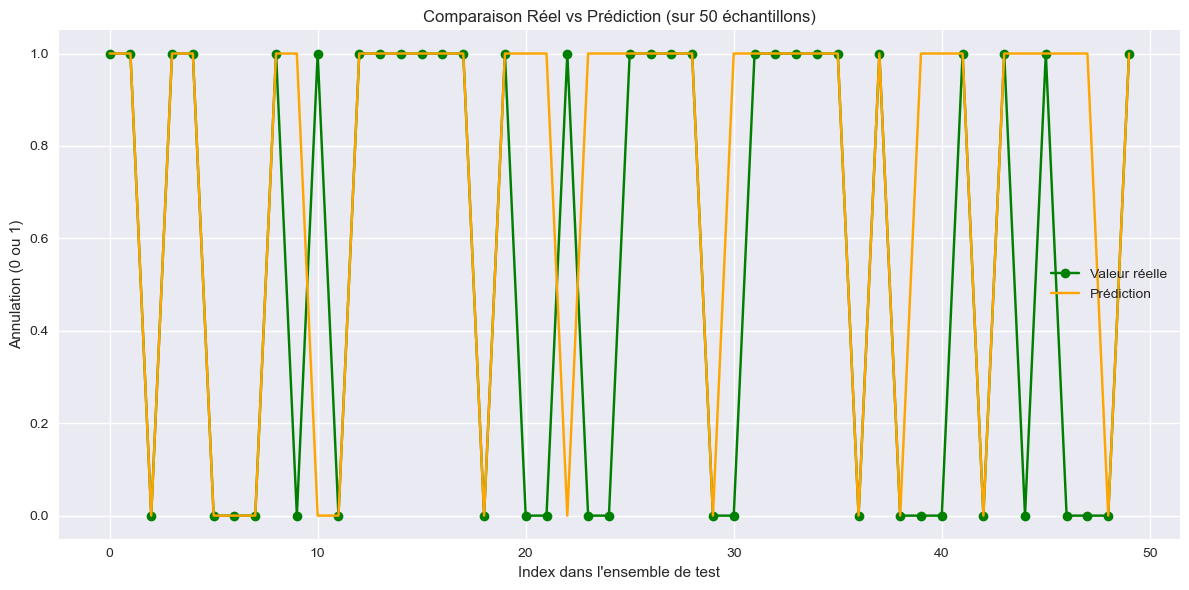

In [13]:
from graph_utils import display_predict_diff_errors2
display_predict_diff_errors2(y_test, prediction_quality, n=50, save_path="rfr_predict_errorRandomForest.png")
